Машинное обучение (ML) — это область компьютерных наук, которая использует алгоритмы для создания и обучения моделей для выполнения рутинных задач. 

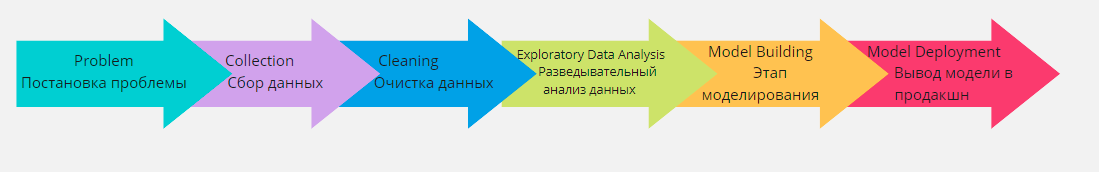

Точность модели (accuracy) машинного обучения определяется как процент правильных прогнозов для тестовых данных и рассчитывается путём деления количества правильных прогнозов на общее количество прогнозов. Обычно это определяющий фактор при оценке успеха проекта машинного обучения — чем выше точность, тем лучше работает модель машинного обучения. 

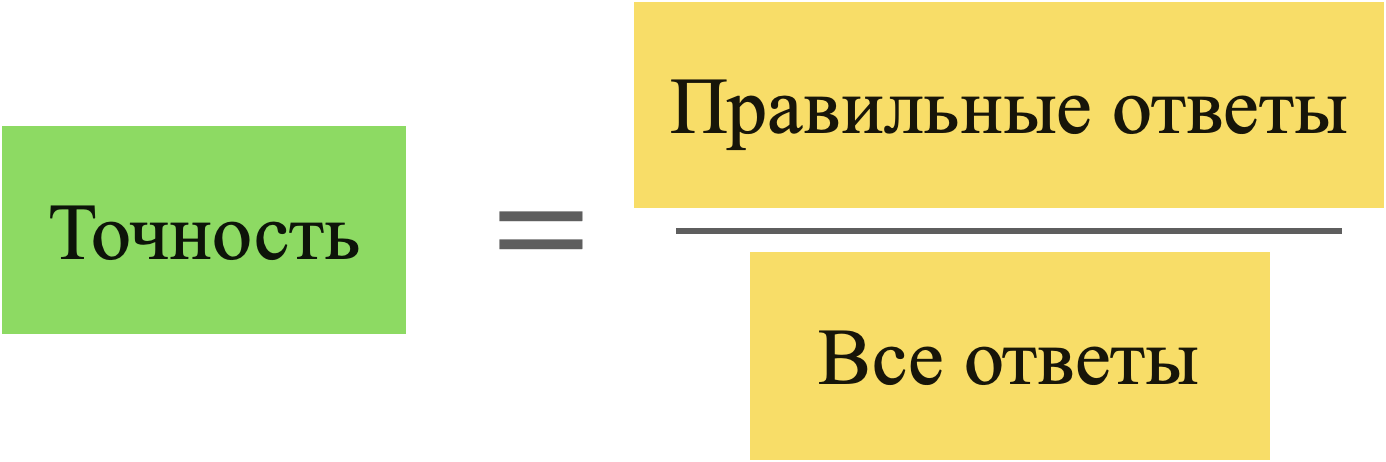

Возникает необходимость отслеживания экспериментов, то есть сохранения всей важной информации, связанной с каждым запускаемым экспериментом, например сохранение параметров запуска, влияющих на производительность модели. Выполнять эту задачу вручную обременительно, поэтому имеет смысл поставить для процесса автоматизированную инфраструктуру — пайплайн (pipeline) машинного обучения.

Пайплайном (pipeline) в ML называется способ систематизации и автоматизации рабочего процесса, необходимого для создания модели машинного обучения. Пайплайны состоят из нескольких последовательных шагов, которые выполняют всё — от извлечения и предварительной обработки данных до обучения и проверки моделей.

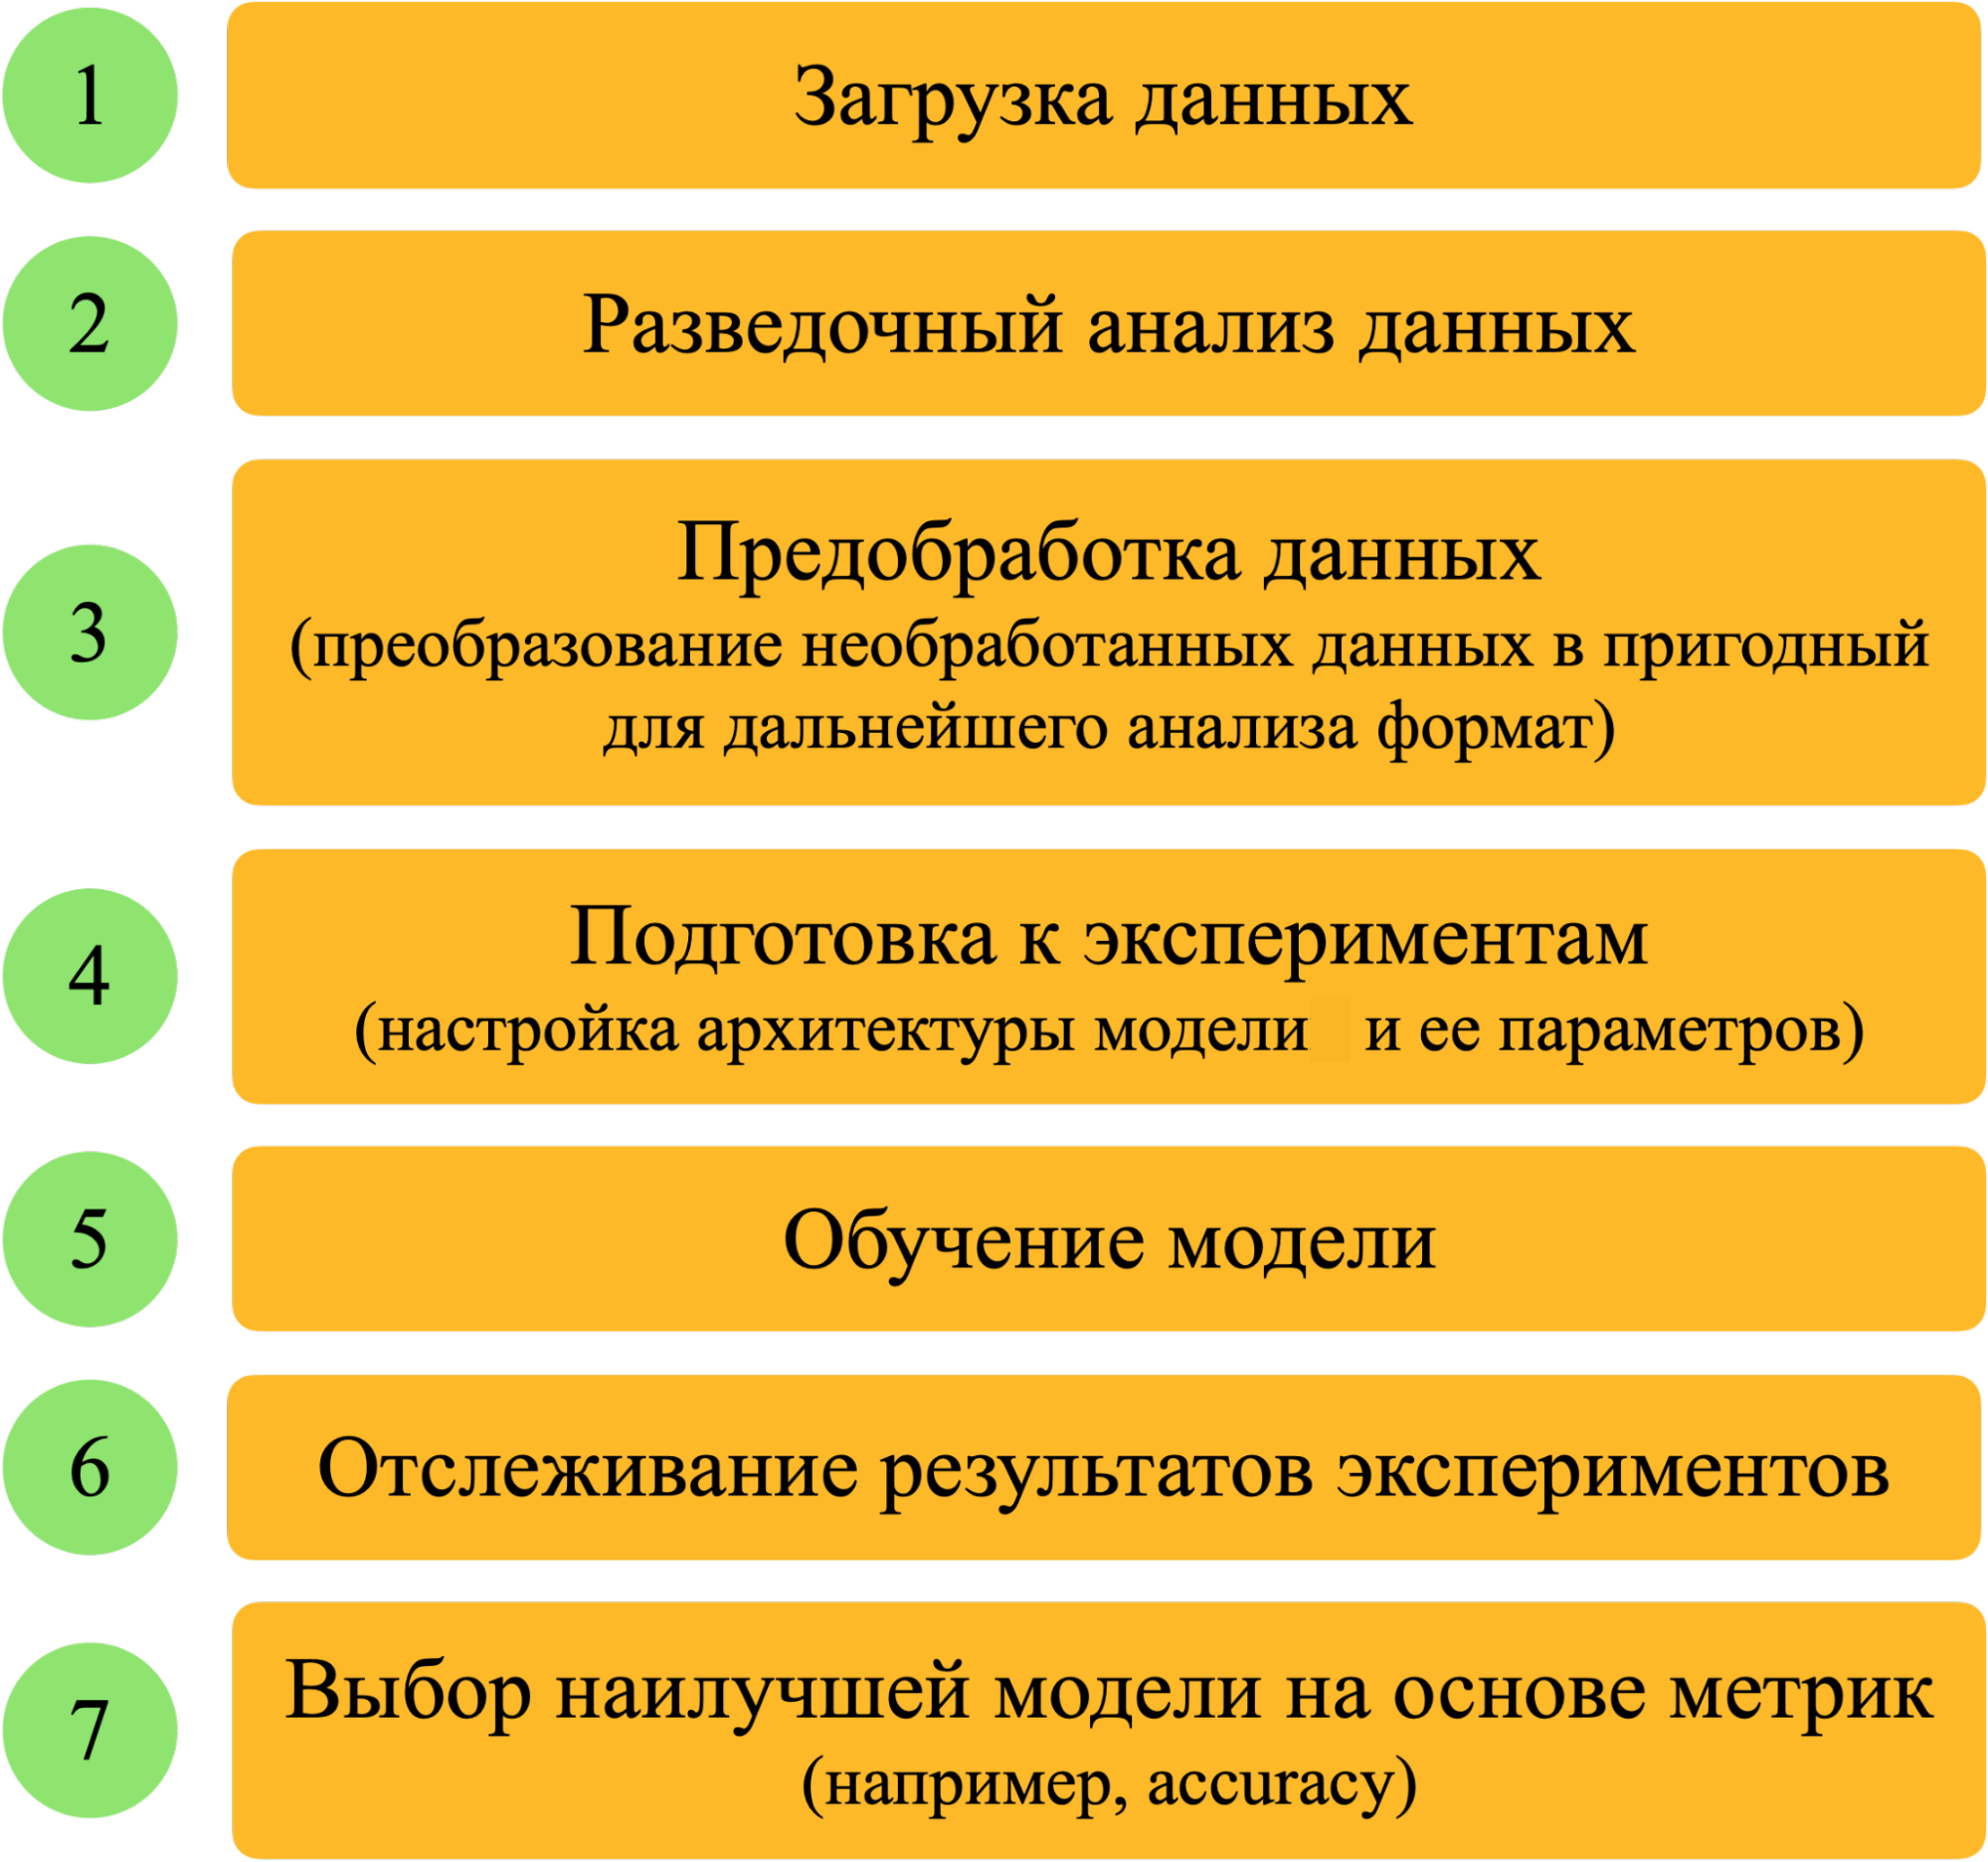

Этот рабочий процесс позволяет осуществлять непрерывную настройку существующих моделей наряду с постоянной оценкой производительности. Самым большим преимуществом этого процесса является то, что его можно автоматизировать с помощью доступных инструментов.

# 3. Логирование экспериментов

Раньше для вывода результатов пользовались функцией print

Таким образом, сравнение результатов ML-экспериментов становится весьма затруднительным процессом, потому что необходимо иметь записи всех проводимых ранее экспериментов. Например, если во время EDA-задачи предсказания спроса на лекарство изменяются данные, то каждый раз выводить на экран новую визуализацию неудобно. 

Логирование решает эту проблему! Даже если информация изменится с запуском нового эксперимента, всё будет зафиксировано в логе. 

Лог (log) — это специальный журнал, в котором хранится информация о состоянии работы программы. Логирование (ведение журнала) обеспечивает отслеживание событий, происходящих во время работы программы, и может выводить эти события в отдельный файл, чтобы вы могли отслеживать, что происходит во время выполнения кода. 

Для логирования в Python используется модуль logging. Он используется большинством сторонних библиотек Python, поэтому вы можете интегрировать свои логи с сообщениями из этих библиотек для создания единого журнала логов приложения. Данный модуль импортируется как другие библиотеки:

In [1]:
import logging

Прежде чем приступить к логированию, необходимо установить базовые настройки:

* уровень;
* обработчик (хендлер);
* формат логирования. 

## НАСТРОЙКА УРОВНЯ ЛОГИРОВАНИЯ

С импортированным модулем logging вы можете использовать так называемый «logger» для логирования сообщений, которые вы хотите видеть (вместо вывода их на экран командой print()). 

По умолчанию существует пять стандартных уровней логирования, указывающих на важность событий: 

* отладка;
* информация;
* предупреждение;
* ошибка;
* критический. 

Самый низкий уровень из данных — не установлен, а самый высокий уровень является критическим. Установив уровень логирования, можно записать сообщение специально для этого уровня в определённый файл журнала. Возле сообщения будет указан его уровень.

In [2]:
import logging
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

ERROR:root:This is an error message
CRITICAL:root:This is a critical message


Здесь мы дали команду залогировать пять сообщений. Вывод команд показывает уровень важности перед каждым сообщением (WARNING/ERROR/CRITICAL). root — имя логгера по умолчанию.

Обратите внимание, что сообщения debug() и info() не были отображены. Это связано с тем, что по умолчанию модуль ведения журнала регистрирует сообщения только с уровнем ПРЕДУПРЕЖДЕНИЕ (WARNING) или выше. Вы можете изменить это, сконфигурировав модуль logging для регистрации событий всех уровней, то есть установив уровень на ОТЛАДКУ (DEBUG). 

Чтобы сделать это, нужно сначала сбросить настройки библиотеки logging, перезапустив наш ноутбук. В VS Code это делается с помощью кнопки перезапуска:



Другой вариант сбросить настройки logging — воспользоваться функцией reload() из вспомогательной системной библиотеки importlib:

In [3]:
from importlib import reload
import logging
reload(logging)

<module 'logging' from 'd:\\Program Files\\Python311\\Lib\\logging\\__init__.py'>

Далее, когда настройки логирования сброшены, нам необходимо перед выводом сообщений, сразу после импорта, изменить конфигурацию логгера.

In [4]:
logging.basicConfig(level=logging.DEBUG)

In [5]:
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

DEBUG:root:This is a debug message
INFO:root:This is an informational message
ERROR:root:This is an error message
CRITICAL:root:This is a critical message


Однако, как вы понимаете, логирование в консоль ничем не лучше простого вывода сообщений с помощью функции print(). Обычно логирование производится в специальные лог-файлы, для этого используются обработчики (хендлеры) логов. Давайте рассмотрим пример логирования в файл.

## УСТАНОВКА ОБРАБОТЧИКА ЛОГИРОВАНИЯ

Функция обработчиков ведения журналов состоит в том, чтобы отображать записи/сообщения журнала на любом выходе, который вы выберете. То есть вы можете выбрать, отображать ли ваш лог в виде файла, HTTP-страницы или даже отправить лог на электронную почту через SMTP. 

Допускается несколько способо вывода одновременно файл/email.
Подробнее : https://digitology.tech/docs/python_3/library/logging.handlers.html

Обработчики являются классами модуля logging. Нам понадобится обработчик FileHandler, который возьмёт запись/сообщение журнала и добавит его в файл журнала log_file.log:

In [6]:
logging.FileHandler('log_file.log')

<FileHandler d:\PyProjects\EDA-5. Проектирование экспериментов\log_file.log (NOTSET)>

## УСТАНОВКА ФОРМАТА ЛОГИРОВАНИЯ

Как мы уже сказали, типичный формат лога выглядит так: уровень: имя: сообщение. Однако его можно изменить.

In [7]:
from importlib import reload
import logging
reload(logging)
 
logging.basicConfig(
    format="%(levelname)s: %(asctime)s: %(message)s",
    level=logging.DEBUG
)
logging.info('Check')

INFO: 2023-05-24 20:58:44,097: Check


Здесь формат записей журнала включает дату, время, уровень ведения журнала и само сообщение.

Создадим функцию get_logger() для генерации лог-файла и записи в него информации.

In [8]:
reload(logging)

<module 'logging' from 'd:\\Program Files\\Python311\\Lib\\logging\\__init__.py'>

In [9]:
import os.path

# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
    """Создаём лог-файл для логгирования в него

    Args:
        path (string): имя к дериктории
        file (string): имяфайла
    Вовзращаем:
        [pbj]: [логер]
    """
    
    # проверяем, существует ли файл
    log_file = os.path.join(path, file)
    
    # если файла нет, создаем его
    if not os.path.isfile(log_file):
        open(log_file, 'w+').close()
        
    # поменяем формат логирования
    file_logging_format = '%(levelname)s: %(asctime)s: %(message)s'
    
    #конфигурируем лог-файл
    logging.basicConfig(level=logging.INFO,
                        format = file_logging_format)
    logger = logging.getLogger()
    
    # создадим хэндлер для записи лога в файл
    handler = logging.FileHandler(log_file)
    
    # установим уровень логирования
    handler.setLevel(logging.INFO)
    
    # создадим формат логирования используя file_Logging_format
    formatter = logging.Formatter(file_logging_format)
    handler.setFormatter(formatter)
    
    # добавим хендлер лог-файлу
    logger.addHandler(handler)
    return logger

In [13]:
import pandas as pd
df = pd.read_csv('data/KaggleV2-May-2016.csv')

Итак, get_logger принимает на вход папку, в которой вы хотите хранить файл лога и имя файла. Функция нацелена на создание информационных сообщений и записи их в лог-файл. Для того, чтобы освежить в памяти знания по работе с файлами, вы можете вернуться к Блоку 2 нашего курса («Подгрузка данных»).  

Для удобства лог-файлы хранят в отдельной директории. Новую папку можно создать с помощью команды mkdir:

In [10]:
!mkdir logs

Создадим лог-файл и запишем туда информацию о датасете.

In [14]:
logger = get_logger(path="logs/", file="data.logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

INFO: 2023-05-24 21:16:08,372: Data
INFO: 2023-05-24 21:16:08,375: Data shape (110527, 14)
INFO: 2023-05-24 21:16:08,422: Percentage of women: 0.653882342398853
INFO: 2023-05-24 21:16:08,438: Percentage of men: 0.346117657601147


In [15]:
if df.shape != (110526,14):
 logger.error('Data shape is incorrect!')

ERROR: 2023-05-24 21:17:09,300: Data shape is incorrect!


решение в файле noshowappointments_logging.ipynb